# Introduction

This module provides tools to simulate scattering intensities detected by POPS as a function of particle size, refractive index, and some more less obvious parameters. Simulations are based on mie scattering, which gives the module the name. The only function that is worth mentioning is the one below. Its worth exploring all the optional parameters.

# Imports

In [1]:
from atmPy.aerosols.instruments.POPS import mie
%matplotlib inline

In [2]:
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 200

# standard settings

In [6]:
d,amp = mie.makeMie_diameter(noOfdiameters=1000)

Text(0.5, 0, 'Diameter ($\\mu$m)')

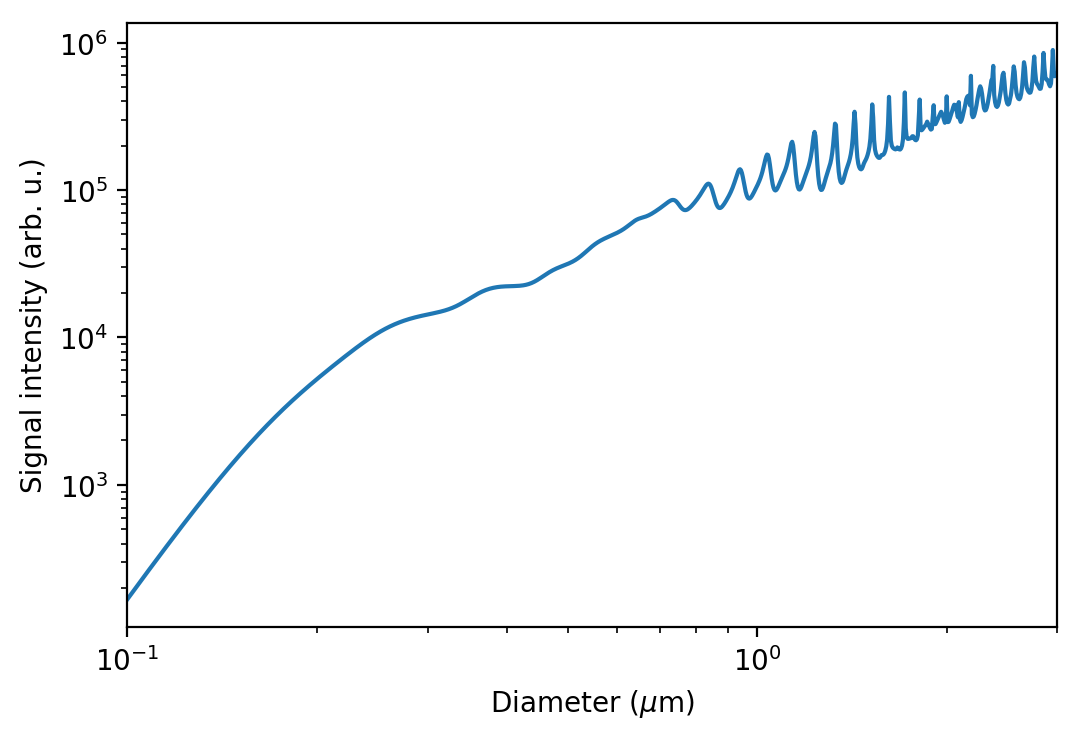

In [7]:
f,a = plt.subplots()
a.plot(d,amp)
a.loglog()
a.set_xlim((0.1,3))
a.set_ylabel('Signal intensity (arb. u.)')
a.set_xlabel('Diameter ($\mu$m)')

# Wavelength dependence

## as an example what would it mean to use a 445nm instead of a 405nm laser

In [35]:
noofpoints = 1000
d,amp405 = mie.makeMie_diameter(noOfdiameters=noofpoints, WavelengthInUm=0.405)
d,amp445 = mie.makeMie_diameter(noOfdiameters=noofpoints, WavelengthInUm=0.445)

[]

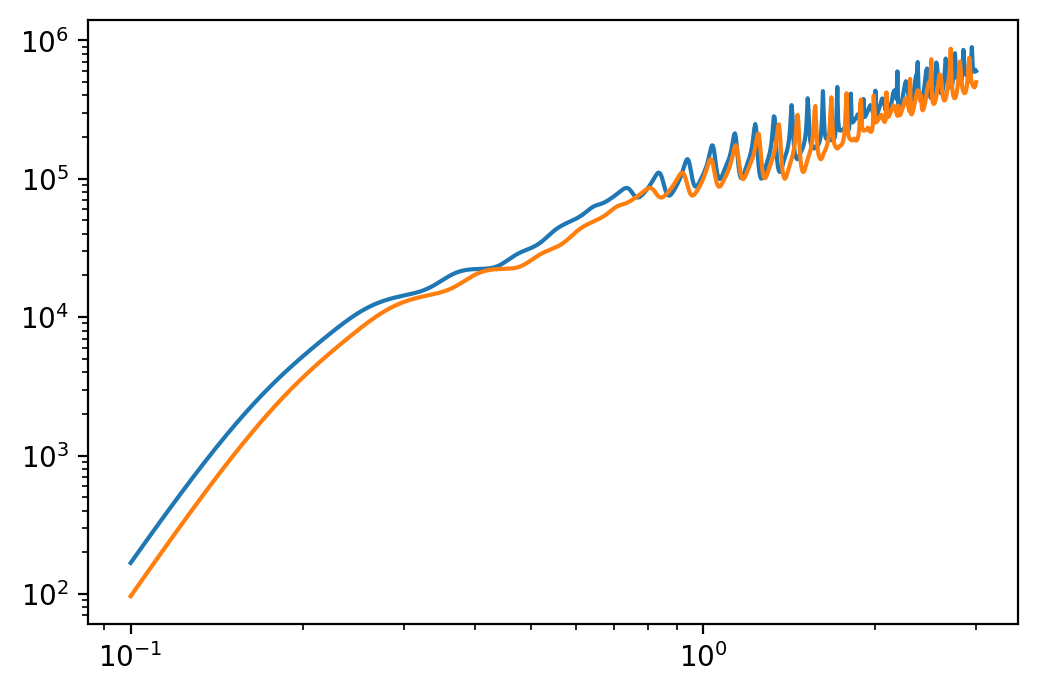

In [36]:
f,a = plt.subplots()
a.plot(d, amp405, label = '405')
a.plot(d, amp445, label = '445')
a.loglog()

In [38]:
lim = [0.14, 3]
arglim = [abs(d - lim[0]).argmin(), abs(d - lim[1]).argmin()]
# arglim

scs_at_lim_405= amp405[arglim]
# scs_at_lim_405

#w the lower detection limit will go up to 
d[abs(amp445 - scs_at_lim_405[0]).argmin()]

0.15409274138061216

# refractive index dependence

In [75]:
nop = 1000
dI,ampI = mie.makeMie_diameter(noOfdiameters=nop, IOR=1.4)
dII,ampII = mie.makeMie_diameter(noOfdiameters=nop, IOR=1.5)
dIII,ampIII = mie.makeMie_diameter(noOfdiameters=nop, IOR=1.6)

<IPython.core.display.Javascript object>


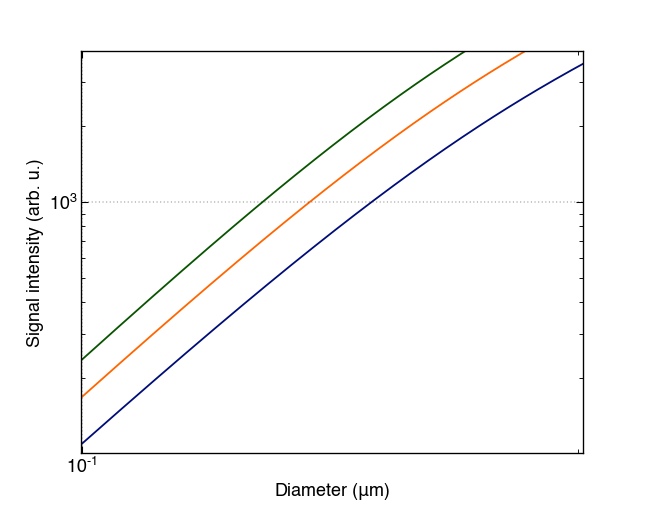

In [76]:
f,a = plt.subplots()
a.plot(dI,ampI)
a.plot(dII,ampII)
a.plot(dIII,ampIII)

a.loglog()
a.set_xlim((0.1,3))
a.set_ylabel('Signal intensity (arb. u.)')
a.set_xlabel('Diameter ($\mu$m)')